In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading Dataset

In [2]:
d = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv")

In [3]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking Information

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.0+ KB


# Checking null values

In [5]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Dropping irrevelant attributes

In [6]:
d1 = d.drop(["Cabin"],axis=1)
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
d1.shape

(889, 11)

In [8]:
d1.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [9]:
d1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoding Categorical Columns

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
d1["Sex"] = label_encoder.fit_transform(d1["Sex"])
d1["Embarked"] = label_encoder.fit_transform(d1["Embarked"])

In [12]:
d1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Splitting Dataset

In [13]:
y = d1.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [14]:
x = d1.drop(["Survived"], axis = 1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


# Analysing Random Forest Tree 

In [15]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = tree.DecisionTreeClassifier(max_depth = 9)

# Fitting model

In [17]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
random_forest = RandomForestClassifier(n_estimators = 1000, max_features = 2, oob_score = True)

In [19]:
random_forest.fit(x,y)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

# Checking score

In [20]:
random_forest.oob_score_

0.8065241844769404

In [21]:
a = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
for feature,imp in zip(a, random_forest.feature_importances_):
    print(feature,"\t :",imp);

Pclass 	 : 0.0867721624933157
Sex 	 : 0.26060259391005897
Age 	 : 0.2581578140850425
SibSp 	 : 0.05046678787216346
Parch 	 : 0.03912046588340089
Fare 	 : 0.2709449715484624
Embarked 	 : 0.033935204207556004


In [22]:
d1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [24]:
x = d1[['Age', 'Sex', 'Fare','Pclass']]
x.head()

,Age,Sex,Fare,Pclass
0,22.0,1,7.2500,3
1,38.0,0,71.2833,1
2,26.0,0,7.9250,3
3,35.0,0,53.1000,1
4,35.0,1,8.0500,3


In [25]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [26]:
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Creating Tree

In [27]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [28]:
with open('dt2.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Age', 'Sex', 'Fare','Pclass'], out_file=f);

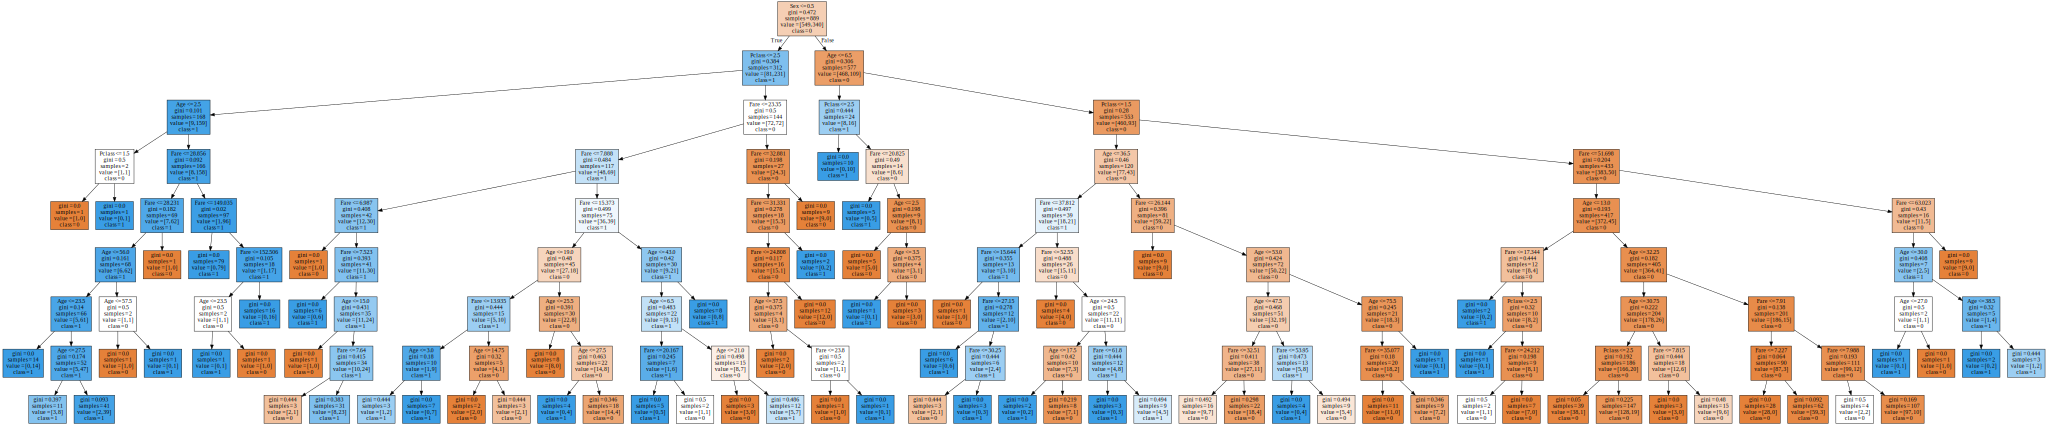

In [29]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Age', 'Sex', 'Fare','Pclass'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

In [30]:
model.score(x,y)


0.8965129358830146

In [32]:
random_forest.fit(x,y)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
random_forest.oob_score_

0.8222722159730034

# Conclusion:

The Accuracy score increases while predicting on Important Columns than predicting on All Columns